In [1]:
import dust_emissivity
from astropy import units as u
from astropy import constants as const
from matplotlib import pyplot as pl
import numpy as np
import regions
from astropy.io import fits
from astropy import wcs
from spectral_cube import SpectralCube
from astropy.table import QTable


fatal: detected dubious ownership in repository at '/blue/adamginsburg/adamginsburg/repos/dask'
To add an exception for this directory, call:

	git config --global --add safe.directory /blue/adamginsburg/adamginsburg/repos/dask


In [2]:
print('test')

test


In [3]:
#  Collision site
pacs160 = 358.38372 * u.Jy
pacs70  = 31.272129 * u.Jy
her350  = 184.0481 * u.Jy
her250  = 320.71168 * u.Jy
her500  = 78.398848 * u.Jy
bolo11  = 4.7052907 * u.Jy
atlas850= 22.663 * u.Jy
reg = regions.Regions.read('../G5/sum/spw17_12CO/ccc.reg')

FileNotFoundError: [Errno 2] No such file or directory: '../G5/sum/spw17_12CO/ccc.reg'

In [ ]:
# G5b 
pacs160 = 935.72057 * u.Jy #1695.505 * u.Jy #358.38372 * u.Jy
pacs70  = 81.665705 * u.Jy #273.89817 * u.Jy #31.272129 * u.Jy
her350  = 436.96762 * u.Jy #758.69611 * u.Jy #184.0481 * u.Jy
her250  = 798.94536 * u.Jy #1399.1185 * u.Jy #320.71168 * u.Jy
her500  = 175.17277 * u.Jy #334.23452 * u.Jy #78.398848 * u.Jy
bolo11  = 8.5816241 * u.Jy #13.466688 * u.Jy #4.7052907 * u.Jy
atlas850= 45.911349 * u.Jy #99.474503 * u.Jy #22.663 * u.Jy
reg = regions.Regions.read('/orange/adamginsburg/cmz/g5/code/g5-lowvelo.reg')

In [4]:
# G5a
pacs160 = 1695.505 * u.Jy #358.38372 * u.Jy
pacs70  = 273.89817 * u.Jy #31.272129 * u.Jy
her350  = 758.69611 * u.Jy #184.0481 * u.Jy
her250  = 1399.1185 * u.Jy #320.71168 * u.Jy
her500  = 334.23452 * u.Jy #78.398848 * u.Jy
bolo11  = 13.466688 * u.Jy #4.7052907 * u.Jy
atlas850= 99.474503 * u.Jy #22.663 * u.Jy
reg = regions.Regions.read('/orange/adamginsburg/cmz/g5/code/g5-highvelo.reg')


In [7]:
# Field 2
pacs160 = 1293.3408711236984 * u.Jy
pacs70  = 139.69878764504287 * u.Jy
her350  = 696.3290434110337  * u.Jy
her250  = 1296.7746088093395 * u.Jy
her500  = 290.8775740884424  * u.Jy
bolo11  = 11.132808608750626 * u.Jy
atlas850= 80.42944585935663  * u.Jy
reg = regions.Regions.read('/orange/adamginsburg/cmz/g5/code/g5-field2.reg')

In [8]:
r0 = reg[0]


In [9]:
reg[0].width

<Quantity 753.1274 arcsec>

In [10]:
area_as = reg[0].width*reg[0].height#195.4252*u.arcsec*163.3396*u.arcsec
total_mass = 2e22*u.cm**-2 * (area_as*(7*u.kpc)**2).to(u.cm**2, u.dimensionless_angles()) * 2.8*u.Da
total_mass.to(u.M_sun)

<Quantity 62228.22224045 solMass>

In [11]:
freq = [160*u.micron, 70*u.micron, 350*u.micron, 250*u.micron, 500*u.micron, ]

In [12]:
# Error bars are quadrature sum of statistical uncertainty (background noise) and inherent uncertainty due to flux calibration 
err70  = np.sqrt((0.05 * pacs70)**2 + (0.0090522 * u.Jy)**2) # Hi-GAL
err160 = np.sqrt((0.05 * pacs160)**2 + (0.022673243 * u.Jy)**2) # ---
err250 = np.sqrt((0.05 * her250)**2 + (0.10495919 * u.Jy)**2) # ---
err350 = np.sqrt((0.05 * her350)**2 + (0.10400883 * u.Jy)**2) # ---
err500 = np.sqrt((0.05 * her500)**2 + (0.095411145 * u.Jy)**2) # Hi-GAL
err850 = np.sqrt((0.15 * atlas850)**2 + (0.0022267786 * u.Jy)**2) # Atlasgal
err11  = np.sqrt((0.20 * bolo11)**2 + (0.0024273499 * u.Jy)**2) # Bolocam

In [13]:
'''
sed = [(160*u.micron, pacs160, 'pacs', '160 um'), # pacsfn_1
(70*u.micron, pacs70, 'pacs', '70 um'), # pacsfn_1
(350*u.micron, her350, 'Herschel', '350 um'), # herfn_2
(250*u.micron, her250, 'Herschel', '250 um'), # herfn_1
(500*u.micron, her500, 'Herschel', '500 um'), # herfn_3
((1.1*u.mm).to(u.micron), bolo11, 'Bolocam' ,'1.1 mm'), # Bolocam
(850*u.micron, atlas850, 'ATLASGAL', '850 um')]      
#((353 * u.GHz).to(u.micron, equivalencies=u.spectral()), atlas850, 'ATLASGAL', '850 um')] # ATLASGAL
'''

"\nsed = [(160*u.micron, pacs160, 'pacs', '160 um'), # pacsfn_1\n(70*u.micron, pacs70, 'pacs', '70 um'), # pacsfn_1\n(350*u.micron, her350, 'Herschel', '350 um'), # herfn_2\n(250*u.micron, her250, 'Herschel', '250 um'), # herfn_1\n(500*u.micron, her500, 'Herschel', '500 um'), # herfn_3\n((1.1*u.mm).to(u.micron), bolo11, 'Bolocam' ,'1.1 mm'), # Bolocam\n(850*u.micron, atlas850, 'ATLASGAL', '850 um')]      \n#((353 * u.GHz).to(u.micron, equivalencies=u.spectral()), atlas850, 'ATLASGAL', '850 um')] # ATLASGAL\n"

In [14]:
sed = [
    (70*u.micron, pacs70, 'PACS', '70 um', err70), # pacsfn_1
    (160*u.micron, pacs160, 'PACS', '160 um', err160), # pacsfn_1
    (250*u.micron, her250, 'Herschel', '250 um', err250), # herfn_1
    (350*u.micron, her350, 'Herschel', '350 um', err350), # herfn_2
    (500*u.micron, her500, 'Herschel', '500 um', err500), # herfn_3
    (850*u.micron, atlas850, 'ATLASGAL', '850 um', err850),
    ((1.1*u.mm).to(u.micron), bolo11, 'Bolocam' ,'1.1 mm', err11) # Bolocam
]      
#((353 * u.GHz).to(u.micron, equivalencies=u.spectral()), atlas850, 'ATLASGAL', '850 um')] # ATLASGAL

In [15]:
sed

[(<Quantity 70. micron>,
  <Quantity 139.69878765 Jy>,
  'PACS',
  '70 um',
  <Quantity 6.98494525 Jy>),
 (<Quantity 160. micron>,
  <Quantity 1293.34087112 Jy>,
  'PACS',
  '160 um',
  <Quantity 64.66704753 Jy>),
 (<Quantity 250. micron>,
  <Quantity 1296.77460881 Jy>,
  'Herschel',
  '250 um',
  <Quantity 64.83881539 Jy>),
 (<Quantity 350. micron>,
  <Quantity 696.32904341 Jy>,
  'Herschel',
  '350 um',
  <Quantity 34.81660753 Jy>),
 (<Quantity 500. micron>,
  <Quantity 290.87757409 Jy>,
  'Herschel',
  '500 um',
  <Quantity 14.54419166 Jy>),
 (<Quantity 850. micron>,
  <Quantity 80.42944586 Jy>,
  'ATLASGAL',
  '850 um',
  <Quantity 12.06441708 Jy>),
 (<Quantity 1100. micron>,
  <Quantity 11.13280861 Jy>,
  'Bolocam',
  '1.1 mm',
  <Quantity 2.22656304 Jy>)]

In [16]:
'''
modfit = dust_emissivity.fit_sed.fit_modified_bb(xdata=u.Quantity([p[0] for p in sed]).to(u.Hz, u.spectral()),
                                        flux=u.Quantity([p[1] for p in sed]),
                                        error=u.Quantity([1*u.Jy for p in sed]),
                                        guesses=[15*u.K, 2, 1e18*u.cm**-2],
                                        fitter='lmfit'
                                       )
'''

"\nmodfit = dust_emissivity.fit_sed.fit_modified_bb(xdata=u.Quantity([p[0] for p in sed]).to(u.Hz, u.spectral()),\n                                        flux=u.Quantity([p[1] for p in sed]),\n                                        error=u.Quantity([1*u.Jy for p in sed]),\n                                        guesses=[15*u.K, 2, 1e18*u.cm**-2],\n                                        fitter='lmfit'\n                                       )\n"

In [17]:
u.Quantity([p[4]/area_as.to(u.sr) for p in sed])

<Quantity [ 2449085.780156  , 22673784.96639763, 22734010.81117642,
           12207519.94148668,  5099535.03074139,  4230067.85002413,
             780685.27358353] Jy / sr>

In [18]:
u.Quantity([p[1]*0.1/area_as.to(u.sr) for p in sed])

<Quantity [ 4898167.4470493 , 45347567.14548537, 45467962.049672  ,
           24414930.94082647, 10198850.60203124,  2820045.18531335,
             390342.40483294] Jy / sr>

In [19]:
u.Quantity([p[1]/area_as.to(u.sr) for p in sed])

<Quantity [4.89816745e+07, 4.53475671e+08, 4.54679620e+08, 2.44149309e+08,
           1.01988506e+08, 2.82004519e+07, 3.90342405e+06] Jy / sr>

In [20]:
modfit,errs = dust_emissivity.fit_sed.fit_modified_bb(xdata=u.Quantity([p[0] for p in sed]).to(u.Hz, u.spectral()),
                                        flux=u.Quantity([p[1]/area_as.to(u.sr) for p in sed]),
                                        #error=u.Quantity([p[1]*0.1/area_as.to(u.sr) for p in sed]),
                                        error=u.Quantity([p[4]/area_as.to(u.sr) for p in sed]),
                                        guesses=[15*u.K, 2, 1e18*u.cm**-2],
                                        fitter='lmfit',
                                        return_error=True
                                       )
modfit

[<Quantity 18.08840215 K>,
 1.7573612692123384,
 <Quantity 4.33752352e+21 1 / cm2>]

In [21]:
errs

[<Quantity 1.19502387 K>,
 0.2970170702774626,
 <Quantity 6.84314103e+20 1 / cm2>]

In [22]:
freq = (np.linspace(70, 1100, num=50) * u.micron).to(u.Hz, u.spectral())

In [23]:
du = dust_emissivity.blackbody.modified_blackbody(
    #u.Quantity([p[0] for p in sed]).to(u.Hz, u.spectral()), 
    freq,
    temperature = modfit[0], 
    beta = modfit[1], 
    column = modfit[2])
du

<Quantity [4.60064572e-16, 1.83149955e-15, 3.52610005e-15, 4.79413640e-15,
           5.41739441e-15, 5.51108086e-15, 5.26820222e-15, 4.84962353e-15,
           4.36264704e-15, 3.87033140e-15, 3.40587036e-15, 2.98424049e-15,
           2.61005814e-15, 2.28243880e-15, 1.99784652e-15, 1.75169513e-15,
           1.53920728e-15, 1.35584591e-15, 1.19750571e-15, 1.06057459e-15,
           9.41927835e-16, 8.38890288e-16, 7.49185958e-16, 6.70885268e-16,
           6.02355065e-16, 5.42213609e-16, 4.89291257e-16, 4.42596756e-16,
           4.01288668e-16, 3.64651345e-16, 3.32074797e-16, 3.03037893e-16,
           2.77094336e-16, 2.53860969e-16, 2.33008021e-16, 2.14250952e-16,
           1.97343639e-16, 1.82072660e-16, 1.68252495e-16, 1.55721495e-16,
           1.44338478e-16, 1.33979850e-16, 1.24537172e-16, 1.15915093e-16,
           1.08029590e-16, 1.00806464e-16, 9.41800621e-17, 8.80921752e-17,
           8.24910945e-17, 7.73307992e-17] erg / (Hz s sr cm2)>

In [24]:
#be = 1.1744228 * 10**(-8) * u.sr
#pixarea = 2.6813453 * 10**(-10) * u.sr

In [25]:
du.to(u.Jy / u.sr)
#    10−23 erg⋅s−1⋅cm−2⋅Hz−1

<Quantity [4.60064572e+07, 1.83149955e+08, 3.52610005e+08, 4.79413640e+08,
           5.41739441e+08, 5.51108086e+08, 5.26820222e+08, 4.84962353e+08,
           4.36264704e+08, 3.87033140e+08, 3.40587036e+08, 2.98424049e+08,
           2.61005814e+08, 2.28243880e+08, 1.99784652e+08, 1.75169513e+08,
           1.53920728e+08, 1.35584591e+08, 1.19750571e+08, 1.06057459e+08,
           9.41927835e+07, 8.38890288e+07, 7.49185958e+07, 6.70885268e+07,
           6.02355065e+07, 5.42213609e+07, 4.89291257e+07, 4.42596756e+07,
           4.01288668e+07, 3.64651345e+07, 3.32074797e+07, 3.03037893e+07,
           2.77094336e+07, 2.53860969e+07, 2.33008021e+07, 2.14250952e+07,
           1.97343639e+07, 1.82072660e+07, 1.68252495e+07, 1.55721495e+07,
           1.44338478e+07, 1.33979850e+07, 1.24537172e+07, 1.15915093e+07,
           1.08029590e+07, 1.00806464e+07, 9.41800621e+06, 8.80921752e+06,
           8.24910945e+06, 7.73307992e+06] Jy / sr>

In [26]:
'''
#pl.loglog(u.Quantity([p[0] for p in sed]).to(u.Hz, u.spectral()), du.to(u.Jy / u.sr))
fig, ax1 = pl.subplots()
pl.yscale('log')

ax2 = ax1.twinx()
pl.yscale('log')

ax1.plot(freq.to(u.micron, u.spectral()), du.to(u.Jy / u.sr), color='green')
ax2.scatter(u.Quantity([p[0] for p in sed]).to(u.micron, u.spectral()), u.Quantity([p[1] for p in sed]), color='blue')

ax1.set_xlabel('Wavelength ($\mu$m)')
ax1.set_ylabel('Jy/ster', color='green')
ax2.set_ylabel('Jy', color='blue')

pl.show()


#pl.loglog(freq.to(u.micron, u.spectral()), du.to(u.Jy / u.sr), color='orange')
#pl.scatter(u.Quantity([p[0] for p in sed]).to(u.micron, u.spectral()), u.Quantity([p[1] for p in sed]))
#pl.xlabel('Wavelength ($\mu$m)')
'''

"\n#pl.loglog(u.Quantity([p[0] for p in sed]).to(u.Hz, u.spectral()), du.to(u.Jy / u.sr))\nfig, ax1 = pl.subplots()\npl.yscale('log')\n\nax2 = ax1.twinx()\npl.yscale('log')\n\nax1.plot(freq.to(u.micron, u.spectral()), du.to(u.Jy / u.sr), color='green')\nax2.scatter(u.Quantity([p[0] for p in sed]).to(u.micron, u.spectral()), u.Quantity([p[1] for p in sed]), color='blue')\n\nax1.set_xlabel('Wavelength ($\\mu$m)')\nax1.set_ylabel('Jy/ster', color='green')\nax2.set_ylabel('Jy', color='blue')\n\npl.show()\n\n\n#pl.loglog(freq.to(u.micron, u.spectral()), du.to(u.Jy / u.sr), color='orange')\n#pl.scatter(u.Quantity([p[0] for p in sed]).to(u.micron, u.spectral()), u.Quantity([p[1] for p in sed]))\n#pl.xlabel('Wavelength ($\\mu$m)')\n"

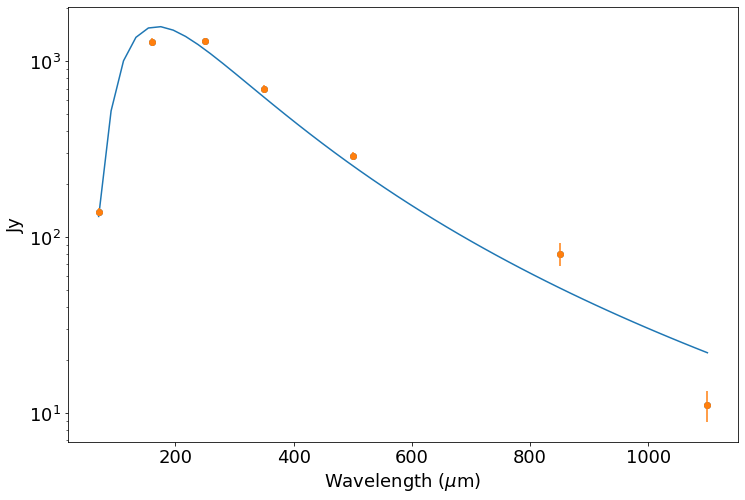

In [27]:
pl.figure(figsize=(12,8))
pl.rcParams.update({'font.size': 18})
pl.plot(freq.to(u.micron, u.spectral()), (du*area_as).to(u.Jy))#, color='#de541e')
pl.scatter(u.Quantity([p[0] for p in sed]).to(u.micron, u.spectral()), u.Quantity([p[1] for p in sed]))#, color='#ad2831')
pl.errorbar(x=u.Quantity([p[0] for p in sed]).to(u.micron, u.spectral()), y=u.Quantity([p[1] for p in sed]), yerr=u.Quantity([p[4] for p in sed]), fmt='o')#, color='#ad2831')

pl.xlabel('Wavelength ($\mu$m)')
pl.ylabel('Jy')
pl.yscale('log')
#pl.savefig('./plots/sed.pdf')
#pl.savefig('./plots/sed.png')

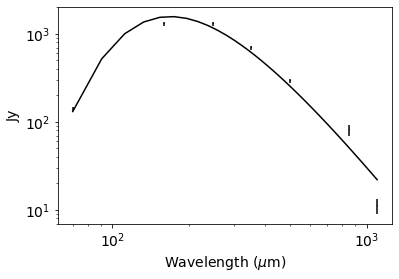

In [28]:
pl.figure(figsize=(6,4))
pl.rcParams.update({'font.size': 14})

pl.loglog(freq.to(u.micron, u.spectral()), (du*area_as).to(u.Jy), color='k')
#pl.scatter(u.Quantity([p[0] for p in sed]).to(u.micron, u.spectral()), u.Quantity([p[1] for p in sed]))#, color='blue')
pl.errorbar(x=u.Quantity([p[0] for p in sed]).to(u.micron, u.spectral()), y=u.Quantity([p[1] for p in sed]), yerr=u.Quantity([p[4] for p in sed]), fmt=',', color='k')
#pl.text(110, 10, str(modfit[0]))
#pl.text(110, 15, str(modfit[1]))
#pl.text(110, 22, str(modfit[2]))

#pl.title('All Points')
pl.xlabel('Wavelength ($\mu$m)')
pl.ylabel('Jy')
pl.savefig('/orange/adamginsburg/cmz/g5/code/plots/dustsed.pdf', bbox_inches='tight')
pl.savefig('/orange/adamginsburg/cmz/g5/code/plots/dustsed.png', bbox_inches='tight', dpi=150)

In [41]:
names = ['Survey', 'Wavelength', 'Flux', 'Error']
t_survey = [p[2] for p in sed]
t_wavelength = u.Quantity([p[0] for p in sed]).to(u.micron, u.spectral())
t_fluxes = u.Quantity([p[1] for p in sed])
t_errors = u.Quantity([p[4] for p in sed])

for ii in range(len(t_survey)):
    t_wavelength[ii] = round(t_wavelength[ii].value)*t_wavelength[ii].unit
    t_fluxes[ii] = round(t_fluxes[ii].value, 1)*t_fluxes[ii].unit
    t_errors[ii] = round(t_errors[ii].value, 1)*t_errors[ii].unit

t = QTable([
            t_survey, 
            t_wavelength,
            t_fluxes,
            t_errors
           ],
           names=names
          )
#t.write('/orange/adamginsburg/cmz/g5/code/plots/table_sed.txt', format='latex')
t

Survey,Wavelength,Flux,Error
,micron,Jy,Jy
str8,float64,float64,float64
PACS,70.0,139.7,7.0
PACS,160.0,1293.3,64.7
Herschel,250.0,1296.8,64.8
Herschel,350.0,696.3,34.8
Herschel,500.0,290.9,14.5
ATLASGAL,850.0,80.4,12.1
Bolocam,1100.0,11.1,2.2


In [160]:
area = (area_as*(7*u.kpc)**2).to(u.cm**2, u.dimensionless_angles()) 
density = total_mass/(area**1.5) # very coarsely
density

<Quantity 1535.18223814 u / cm3>

In [161]:
column_density = modfit[2]
(area**0.5).to(u.pc)


<Quantity 11.82163496 pc>

In [162]:
# X_CO Calculation 
WCO = 466.06297*u.K/u.km/u.s #300*u.K/u.km/u.s
XCO = column_density / WCO
XCO

<Quantity 9.30673278e+18 km s / (cm2 K)>

In [163]:
#column_density* 2.8*u.Da
mass_t = (area * column_density * 2.8*u.Da).to(u.M_sun)
mass_t

<Quantity 13495.81888741 solMass>

In [164]:
density_1 = mass_t/(area**1.5) # very coarsely
density_1.to(u.Da / u.cm**3)

<Quantity 332.94445348 u / cm3>

In [165]:
column_density

<Quantity 4.33752352e+21 1 / cm2>

In [166]:
area.to(u.pc**2)

<Quantity 139.7510532 pc2>

In [167]:
area_as.to(u.arcmin**2)

<Quantity 33.70596574 arcmin2>

In [168]:
name_12co = '/orange/adamginsburg/cmz/g5/G5/sum/newcombination/galcorrected/g5.12CO.spw17.fits'
cube_12co = SpectralCube.read(name_12co).with_spectral_unit(u.km / u.s, velocity_convention='radio')
cut_cube_12co = cube_12co.with_mask(cube_12co>0.05*u.K).spectral_slab(0*u.km / u.second, 225*u.km/u.second).to(u.K)


In [169]:
mom0_12co = cut_cube_12co.moment0()
ww = wcs.WCS(mom0_12co.header)
preg = r0.to_pixel(ww)
mask = preg.to_mask()

In [170]:
cutout = mask.cutout(mom0_12co.data)

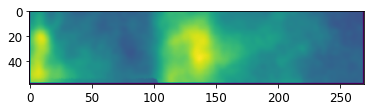

In [171]:
pl.imshow(mask.multiply(mom0_12co.data))

In [172]:
W = np.nanmean(mask.multiply(mom0_12co))
W

<Projection 373.28364278 K km / s>

In [173]:
np.nanstd(mask.multiply(mom0_12co))

<Projection 148.82109491 K km / s>

In [174]:
col_density_Xstrong = mask.multiply(mom0_12co) * 2.3*10**20 * u.cm**(-2) * (u.K * u.km / u.s)**(-1) * 0.8


In [175]:
column_density/W

<Projection 1.16199132e+19 s / (cm2 K km)>

In [176]:
(column_density/W / (2.3*10**20 * u.cm**(-2) * (u.K * u.km / u.s)**(-1)))**(-1)

<Projection 19.79360743>

In [177]:
2.7 * u.Msun / u.year

<Quantity 2.7 solMass / yr>

In [178]:
2.7 * u.Msun / u.year * column_density/(W*0.8) / (2.3*10**20 * u.cm**(-2) * (u.K * u.km / u.s)**(-1))

<Projection 0.1705096 solMass / yr>

In [ ]:
# mass_inflow_rate * new_X_CO / old_X_CO

# Alternate Fits

## Fit without 24$\mu$m

In [179]:
modfit,errs = dust_emissivity.fit_sed.fit_modified_bb(xdata=u.Quantity([p[0] for p in sed]).to(u.Hz, u.spectral())[1:],
                                        flux=u.Quantity([p[1]/area_as.to(u.sr) for p in sed])[1:],
                                        #error=u.Quantity([p[1]*0.1/area_as.to(u.sr) for p in sed]),
                                        error=u.Quantity([p[4]/area_as.to(u.sr) for p in sed])[1:],
                                        guesses=[15*u.K, 2, 1e18*u.cm**-2],
                                        fitter='lmfit',
                                        return_error=True
                                       )
modfit

[<Quantity 12.94520228 K>,
 2.6170622633279885,
 <Quantity 8.50135229e+21 1 / cm2>]

In [180]:
du = dust_emissivity.blackbody.modified_blackbody(
    #u.Quantity([p[0] for p in sed]).to(u.Hz, u.spectral()), 
    freq,
    temperature = modfit[0], 
    beta = modfit[1], 
    column = modfit[2])
du

<Quantity [5.13315579e-17, 5.08219564e-16, 1.63382879e-15, 3.04854523e-15,
           4.23502266e-15, 4.95134343e-15, 5.20612465e-15, 5.11628613e-15,
           4.81135638e-15, 4.39498202e-15, 3.93815439e-15, 3.48454492e-15,
           3.05834370e-15, 2.67106306e-15, 2.32650788e-15, 2.02409998e-15,
           1.76097870e-15, 1.53326977e-15, 1.33681777e-15, 1.16758539e-15,
           1.02185192e-15, 8.96294549e-16, 7.88004060e-16, 6.94465816e-16,
           6.13524306e-16, 5.43341702e-16, 4.82356122e-16, 4.29242542e-16,
           3.82877649e-16, 3.42309044e-16, 3.06728682e-16, 2.75450230e-16,
           2.47889897e-16, 2.23550284e-16, 2.02006813e-16, 1.82896355e-16,
           1.65907695e-16, 1.50773550e-16, 1.37263871e-16, 1.25180227e-16,
           1.14351093e-16, 1.04627877e-16, 9.58815823e-17, 8.79999832e-17,
           8.08852424e-17, 7.44518907e-17, 6.86251124e-17, 6.33392881e-17,
           5.85367516e-17, 5.41667302e-17] erg / (cm2 Hz s sr)>

Text(0.5, 1.0, 'No 24$\\mu$m')

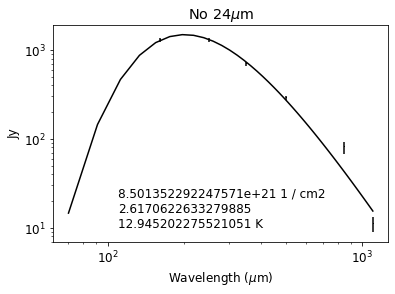

In [181]:
pl.figure(figsize=(6,4))
pl.rcParams.update({'font.size': 12})

pl.loglog(freq.to(u.micron, u.spectral()), (du*area_as).to(u.Jy), color='k')
#pl.scatter(u.Quantity([p[0] for p in sed]).to(u.micron, u.spectral()), u.Quantity([p[1] for p in sed]))#, color='blue')
pl.errorbar(x=u.Quantity([p[0] for p in sed]).to(u.micron, u.spectral())[1:], y=u.Quantity([p[1] for p in sed])[1:], yerr=u.Quantity([p[4] for p in sed])[1:], fmt=',', color='k')
pl.text(110, 10, str(modfit[0]))
pl.text(110, 15, str(modfit[1]))
pl.text(110, 22, str(modfit[2]))

pl.xlabel('Wavelength ($\mu$m)')
pl.ylabel('Jy')
pl.title('No 24$\mu$m')
#pl.savefig('/orange/adamginsburg/cmz/g5/code/plots/dustsed.pdf', bbox_inches='tight')

## Fit without 1.1mm

In [182]:
modfit,errs = dust_emissivity.fit_sed.fit_modified_bb(xdata=u.Quantity([p[0] for p in sed]).to(u.Hz, u.spectral())[:-1],
                                        flux=u.Quantity([p[1]/area_as.to(u.sr) for p in sed])[:-1],
                                        #error=u.Quantity([p[1]*0.1/area_as.to(u.sr) for p in sed]),
                                        error=u.Quantity([p[4]/area_as.to(u.sr) for p in sed])[:-1],
                                        guesses=[15*u.K, 2, 1e18*u.cm**-2],
                                        fitter='lmfit',
                                        return_error=True
                                       )
modfit

[<Quantity 19.73275536 K>,
 1.2822757693930409,
 <Quantity 4.81507384e+21 1 / cm2>]

In [183]:
du = dust_emissivity.blackbody.modified_blackbody(
    #u.Quantity([p[0] for p in sed]).to(u.Hz, u.spectral()), 
    freq,
    temperature = modfit[0], 
    beta = modfit[1], 
    column = modfit[2])
du

<Quantity [4.81764104e-16, 1.73854092e-15, 3.21719712e-15, 4.32189487e-15,
           4.89566102e-15, 5.03283125e-15, 4.88424674e-15, 4.57667809e-15,
           4.19693287e-15, 3.79824513e-15, 3.41057542e-15, 3.04916918e-15,
           2.72049371e-15, 2.42603321e-15, 2.16460425e-15, 1.93372292e-15,
           1.73038792e-15, 1.55151289e-15, 1.39415196e-15, 1.25560600e-15,
           1.13346135e-15, 1.02559200e-15, 9.30142984e-16, 8.45505300e-16,
           7.70288159e-16, 7.03291550e-16, 6.43480748e-16, 5.89963378e-16,
           5.41969236e-16, 4.98832756e-16, 4.59977919e-16, 4.24905340e-16,
           3.93181252e-16, 3.64428126e-16, 3.38316707e-16, 3.14559229e-16,
           2.92903659e-16, 2.73128784e-16, 2.55040037e-16, 2.38465928e-16,
           2.23254990e-16, 2.09273175e-16, 1.96401611e-16, 1.84534677e-16,
           1.73578349e-16, 1.63448766e-16, 1.54070998e-16, 1.45377975e-16,
           1.37309554e-16, 1.29811719e-16] erg / (cm2 Hz s sr)>

Text(0.5, 1.0, 'No 1.1mm')

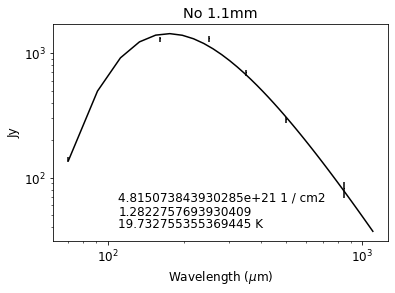

In [184]:
pl.figure(figsize=(6,4))
pl.rcParams.update({'font.size': 12})

pl.loglog(freq.to(u.micron, u.spectral()), (du*area_as).to(u.Jy), color='k')
#pl.scatter(u.Quantity([p[0] for p in sed]).to(u.micron, u.spectral()), u.Quantity([p[1] for p in sed]))#, color='blue')
pl.errorbar(x=u.Quantity([p[0] for p in sed]).to(u.micron, u.spectral())[:-1], y=u.Quantity([p[1] for p in sed])[:-1], yerr=u.Quantity([p[4] for p in sed])[:-1], fmt=',', color='k')
pl.text(110, 40, str(modfit[0]))
pl.text(110, 50, str(modfit[1]))
pl.text(110, 65, str(modfit[2]))

pl.xlabel('Wavelength ($\mu$m)')
pl.ylabel('Jy')
pl.title('No 1.1mm')
#pl.savefig('/orange/adamginsburg/cmz/g5/code/plots/dustsed.pdf', bbox_inches='tight')

## Central Five

In [185]:
modfit,errs = dust_emissivity.fit_sed.fit_modified_bb(xdata=u.Quantity([p[0] for p in sed]).to(u.Hz, u.spectral())[1:-1],
                                        flux=u.Quantity([p[1]/area_as.to(u.sr) for p in sed])[1:-1],
                                        #error=u.Quantity([p[1]*0.1/area_as.to(u.sr) for p in sed]),
                                        error=u.Quantity([p[4]/area_as.to(u.sr) for p in sed])[1:-1],
                                        guesses=[15*u.K, 2, 1e18*u.cm**-2],
                                        fitter='lmfit',
                                        return_error=True
                                       )
modfit

[<Quantity 15.48794861 K>,
 1.9108116207101766,
 <Quantity 6.92299117e+21 1 / cm2>]

In [186]:
du = dust_emissivity.blackbody.modified_blackbody(
    #u.Quantity([p[0] for p in sed]).to(u.Hz, u.spectral()), 
    freq,
    temperature = modfit[0], 
    beta = modfit[1], 
    column = modfit[2])
du

<Quantity [1.48134215e-16, 8.87574922e-16, 2.18801000e-15, 3.50248879e-15,
           4.43649187e-15, 4.90383487e-15, 4.98795271e-15, 4.81465456e-15,
           4.49371363e-15, 4.10386826e-15, 3.69560039e-15, 3.29851050e-15,
           2.92827035e-15, 2.59185281e-15, 2.29108758e-15, 2.02494245e-15,
           1.79092884e-15, 1.58593760e-15, 1.40671716e-15, 1.25013254e-15,
           1.11329349e-15, 9.93606274e-16, 8.88782661e-16, 7.96826030e-16,
           7.16006566e-16, 6.44832298e-16, 5.82019790e-16, 5.26466477e-16,
           4.77225551e-16, 4.33483722e-16, 3.94541831e-16, 3.59798137e-16,
           3.28733986e-16, 3.00901610e-16, 2.75913741e-16, 2.53434805e-16,
           2.33173452e-16, 2.14876217e-16, 1.98322152e-16, 1.83318256e-16,
           1.69695603e-16, 1.57306036e-16, 1.46019358e-16, 1.35720924e-16,
           1.26309593e-16, 1.17695963e-16, 1.09800860e-16, 1.02554044e-16,
           9.58930834e-17, 8.97623912e-17] erg / (cm2 Hz s sr)>

Text(0.5, 1.0, 'Central Five')

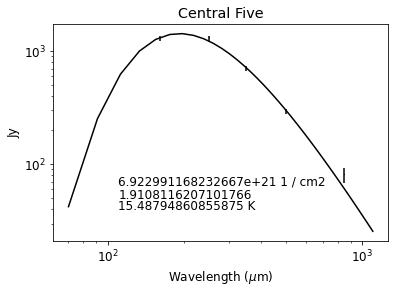

In [187]:
pl.figure(figsize=(6,4))
pl.rcParams.update({'font.size': 12})

pl.loglog(freq.to(u.micron, u.spectral()), (du*area_as).to(u.Jy), color='k')
#pl.scatter(u.Quantity([p[0] for p in sed]).to(u.micron, u.spectral()), u.Quantity([p[1] for p in sed]))#, color='blue')
pl.errorbar(x=u.Quantity([p[0] for p in sed]).to(u.micron, u.spectral())[1:-1], y=u.Quantity([p[1] for p in sed])[1:-1], yerr=u.Quantity([p[4] for p in sed])[1:-1], fmt=',', color='k')
pl.text(110, 40, str(modfit[0]))
pl.text(110, 50, str(modfit[1]))
pl.text(110, 65, str(modfit[2]))

pl.xlabel('Wavelength ($\mu$m)')
pl.ylabel('Jy')
pl.title('Central Five')
#pl.savefig('/orange/adamginsburg/cmz/g5/code/plots/dustsed.pdf', bbox_inches='tight')

## Left Five

In [188]:
modfit,errs = dust_emissivity.fit_sed.fit_modified_bb(xdata=u.Quantity([p[0] for p in sed]).to(u.Hz, u.spectral())[:-2],
                                        flux=u.Quantity([p[1]/area_as.to(u.sr) for p in sed])[:-2],
                                        #error=u.Quantity([p[1]*0.1/area_as.to(u.sr) for p in sed]),
                                        error=u.Quantity([p[4]/area_as.to(u.sr) for p in sed])[:-2],
                                        guesses=[15*u.K, 2, 1e18*u.cm**-2],
                                        fitter='lmfit',
                                        return_error=True
                                       )
modfit

[<Quantity 19.68437156 K>,
 1.2950533755730562,
 <Quantity 4.80270465e+21 1 / cm2>]

In [189]:
du = dust_emissivity.blackbody.modified_blackbody(
    #u.Quantity([p[0] for p in sed]).to(u.Hz, u.spectral()), 
    freq,
    temperature = modfit[0], 
    beta = modfit[1], 
    column = modfit[2])
du

<Quantity [4.81265952e-16, 1.74129733e-15, 3.22570722e-15, 4.33470841e-15,
           4.90983303e-15, 5.04595425e-15, 4.89497161e-15, 4.58451949e-15,
           4.20193662e-15, 3.80072310e-15, 3.41093807e-15, 3.04783353e-15,
           2.71783938e-15, 2.42238576e-15, 2.16023284e-15, 1.92884469e-15,
           1.72517497e-15, 1.54609969e-15, 1.38864232e-15, 1.25007908e-15,
           1.12797673e-15, 1.02019385e-15, 9.24863360e-16, 8.40366872e-16,
           7.65306295e-16, 6.98475997e-16, 6.38836944e-16, 5.85493487e-16,
           5.37672952e-16, 4.94707936e-16, 4.56021074e-16, 4.21112017e-16,
           3.89546327e-16, 3.60946040e-16, 3.34981633e-16, 3.11365216e-16,
           2.89844725e-16, 2.70199000e-16, 2.52233581e-16, 2.35777123e-16,
           2.20678338e-16, 2.06803373e-16, 1.94033564e-16, 1.82263507e-16,
           1.71399393e-16, 1.61357579e-16, 1.52063348e-16, 1.43449837e-16,
           1.35457108e-16, 1.28031338e-16] erg / (cm2 Hz s sr)>

Text(0.5, 1.0, 'Left Five')

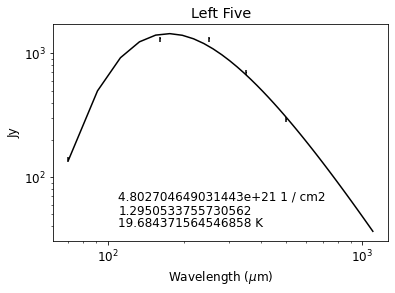

In [190]:
pl.figure(figsize=(6,4))
pl.rcParams.update({'font.size': 12})

pl.loglog(freq.to(u.micron, u.spectral()), (du*area_as).to(u.Jy), color='k')
#pl.scatter(u.Quantity([p[0] for p in sed]).to(u.micron, u.spectral()), u.Quantity([p[1] for p in sed]))#, color='blue')
pl.errorbar(x=u.Quantity([p[0] for p in sed]).to(u.micron, u.spectral())[:-2], y=u.Quantity([p[1] for p in sed])[:-2], yerr=u.Quantity([p[4] for p in sed])[:-2], fmt=',', color='k')
pl.text(110, 40, str(modfit[0]))
pl.text(110, 50, str(modfit[1]))
pl.text(110, 65, str(modfit[2]))

pl.xlabel('Wavelength ($\mu$m)')
pl.ylabel('Jy')
pl.title('Left Five')
#pl.savefig('/orange/adamginsburg/cmz/g5/code/plots/dustsed.pdf', bbox_inches='tight')

## Right Five

In [191]:
modfit,errs = dust_emissivity.fit_sed.fit_modified_bb(xdata=u.Quantity([p[0] for p in sed]).to(u.Hz, u.spectral())[2:],
                                        flux=u.Quantity([p[1]/area_as.to(u.sr) for p in sed])[2:],
                                        #error=u.Quantity([p[1]*0.1/area_as.to(u.sr) for p in sed]),
                                        error=u.Quantity([p[4]/area_as.to(u.sr) for p in sed])[2:],
                                        guesses=[15*u.K, 2, 1e18*u.cm**-2],
                                        fitter='lmfit',
                                        return_error=True
                                       )
modfit

[<Quantity 11.89962323 K>,
 2.804959513020188,
 <Quantity 1.04121744e+22 1 / cm2>]

In [192]:
du = dust_emissivity.blackbody.modified_blackbody(
    #u.Quantity([p[0] for p in sed]).to(u.Hz, u.spectral()), 
    freq,
    temperature = modfit[0], 
    beta = modfit[1], 
    column = modfit[2])
du

<Quantity [1.98387466e-17, 2.80635259e-16, 1.09883875e-15, 2.31630684e-15,
           3.48999406e-15, 4.31856195e-15, 4.73077363e-15, 4.79200740e-15,
           4.60975218e-15, 4.28357114e-15, 3.88846695e-15, 3.47451561e-15,
           3.07208082e-15, 2.69770043e-15, 2.35893221e-15, 2.05785536e-15,
           1.79342132e-15, 1.56295391e-15, 1.36306676e-15, 1.19019998e-15,
           1.04091639e-15, 9.12050479e-16, 8.00769935e-16, 7.04587166e-16,
           6.21343938e-16, 5.49182920e-16, 4.86514208e-16, 4.31981365e-16,
           3.84429371e-16, 3.42875582e-16, 3.06484106e-16, 2.74543559e-16,
           2.46447983e-16, 2.21680588e-16, 1.99799991e-16, 1.80428590e-16,
           1.63242776e-16, 1.47964688e-16, 1.34355286e-16, 1.22208516e-16,
           1.11346403e-16, 1.01614909e-16, 9.28804495e-17, 8.50269391e-17,
           7.79532997e-17, 7.15713455e-17, 6.58039887e-17, 6.05837125e-17,
           5.58512714e-17, 5.15545807e-17] erg / (cm2 Hz s sr)>

Text(0.5, 1.0, 'Right Five')

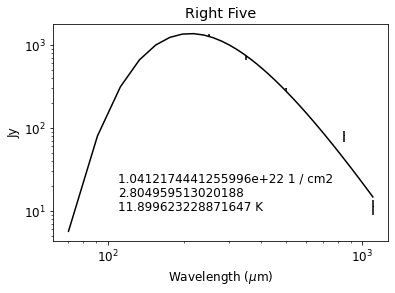

In [193]:
pl.figure(figsize=(6,4))
pl.rcParams.update({'font.size': 12})

pl.loglog(freq.to(u.micron, u.spectral()), (du*area_as).to(u.Jy), color='k')
#pl.scatter(u.Quantity([p[0] for p in sed]).to(u.micron, u.spectral()), u.Quantity([p[1] for p in sed]))#, color='blue')
pl.errorbar(x=u.Quantity([p[0] for p in sed]).to(u.micron, u.spectral())[2:], y=u.Quantity([p[1] for p in sed])[2:], yerr=u.Quantity([p[4] for p in sed])[2:], fmt=',', color='k')
pl.text(110, 10, str(modfit[0]))
pl.text(110, 15, str(modfit[1]))
pl.text(110, 22, str(modfit[2]))

pl.xlabel('Wavelength ($\mu$m)')
pl.ylabel('Jy')
pl.title('Right Five')
#pl.savefig('/orange/adamginsburg/cmz/g5/code/plots/dustsed.pdf', bbox_inches='tight')

# Old

In [ ]:
sed_nobolo = [
    (70*u.micron, pacs70, 'pacs', '70 um'), # pacsfn_1
    (160*u.micron, pacs160, 'pacs', '160 um'), # pacsfn_1
    (250*u.micron, her250, 'Herschel', '250 um'), # herfn_1
    (350*u.micron, her350, 'Herschel', '350 um'), # herfn_2
    (500*u.micron, her500, 'Herschel', '500 um'), # herfn_3
    (850*u.micron, atlas850, 'ATLASGAL', '850 um')#,
    #((1.1*u.mm).to(u.micron), bolo11, 'Bolocam' ,'1.1 mm') # Bolocam
] 

In [ ]:
modfit_nobolo = dust_emissivity.fit_sed.fit_modified_bb(xdata=u.Quantity([p[0] for p in sed_nobolo]).to(u.Hz, u.spectral()),
                                        flux=u.Quantity([p[1] for p in sed_nobolo]),
                                        error=u.Quantity([1*u.Jy for p in sed_nobolo]),
                                        guesses=[16*u.K, 1.5, 1e22*u.cm**-2],
                                        fitter='lmfit'
                                       )
modfit_nobolo

In [ ]:
du_nobolo = dust_emissivity.blackbody.modified_blackbody(
    #u.Quantity([p[0] for p in sed]).to(u.Hz, u.spectral()), 
    freq,
    temperature = modfit_nobolo[0], 
    beta = modfit_nobolo[1], 
    column = modfit_nobolo[2])
du_nobolo

In [ ]:
pl.plot(freq.to(u.micron, u.spectral()), du_nobolo.to(u.Jy / u.sr), color='green')
pl.scatter(u.Quantity([p[0] for p in sed_nobolo]).to(u.micron, u.spectral()), u.Quantity([p[1] for p in sed_nobolo]), color='blue')

pl.xlabel('Wavelength ($\mu$m)')
pl.ylabel('Jy')
pl.yscale('log')

In [ ]:
pl.loglog(freq.to(u.micron, u.spectral()), du_nobolo.to(u.Jy / u.sr), color='green')
pl.scatter(u.Quantity([p[0] for p in sed_nobolo]).to(u.micron, u.spectral()), u.Quantity([p[1] for p in sed_nobolo]), color='blue')
pl.xlabel('Wavelength ($\mu$m)')
pl.ylabel('Jy')

In [ ]:
sed_noatlas = [
    (70*u.micron, pacs70, 'pacs', '70 um'), # pacsfn_1
    (160*u.micron, pacs160, 'pacs', '160 um'), # pacsfn_1
    (250*u.micron, her250, 'Herschel', '250 um'), # herfn_1
    (350*u.micron, her350, 'Herschel', '350 um'), # herfn_2
    (500*u.micron, her500, 'Herschel', '500 um'), # herfn_3
    #(850*u.micron, atlas850, 'ATLASGAL', '850 um')#,
    ((1.1*u.mm).to(u.micron), bolo11, 'Bolocam' ,'1.1 mm') # Bolocam
] 

In [ ]:
modfit_noatlas = dust_emissivity.fit_sed.fit_modified_bb(xdata=u.Quantity([p[0] for p in sed_noatlas]).to(u.Hz, u.spectral()),
                                        flux=u.Quantity([p[1] for p in sed_noatlas]),
                                        error=u.Quantity([1*u.Jy for p in sed_noatlas]),
                                        guesses=[16*u.K, 2, 1e22*u.cm**-2],
                                        fitter='lmfit'
                                       )
modfit_noatlas

In [ ]:
du_noatlas = dust_emissivity.blackbody.modified_blackbody(
    #u.Quantity([p[0] for p in sed]).to(u.Hz, u.spectral()), 
    freq,
    temperature = modfit_noatlas[0], 
    beta = modfit_noatlas[1], 
    column = modfit_noatlas[2])
du_noatlas

In [ ]:
pl.plot(freq.to(u.micron, u.spectral()), du_noatlas.to(u.Jy / u.sr), color='green')
pl.scatter(u.Quantity([p[0] for p in sed_noatlas]).to(u.micron, u.spectral()), u.Quantity([p[1] for p in sed_noatlas]), color='blue')
#pl.scatter(u.Quantity([p[0] for p in sed]).to(u.micron, u.spectral()), u.Quantity([p[1] for p in sed]), color='orange')

pl.xlabel('Wavelength ($\mu$m)')
pl.ylabel('Jy')
pl.yscale('log')

In [ ]:
pl.loglog(freq.to(u.micron, u.spectral()), du_noatlas.to(u.Jy / u.sr), color='green')
pl.scatter(u.Quantity([p[0] for p in sed_noatlas]).to(u.micron, u.spectral()), u.Quantity([p[1] for p in sed_noatlas]), color='blue')
pl.xlabel('Wavelength ($\mu$m)')
pl.ylabel('Jy')

In [ ]:
dust_emissivity.dust.massofsnu?

In [ ]:
dust_emissivity.dust.massofsnu(271.1*u.GHz, 4.7052907*u.Jy, 7*u.kpc, temperature=10*u.K)

In [ ]:
dust_emissivity.dust.massofsnu(271.1*u.GHz, 4.7052907*u.Jy, 7*u.kpc, temperature=modfit[0], beta=modfit[1])
#temp,beta,col

In [ ]:
dust_emissivity.dust.massofsnu(345*u.GHz, 50*u.Jy, 7*u.kpc, temperature=modfit[0], beta=modfit[1])

In [ ]:
(250*u.micron).to(u.GHz, u.spectral())

In [ ]:
dust_emissivity.dust.massofsnu((250*u.micron).to(u.GHz, u.spectral()), her250, 7*u.kpc, temperature=modfit[0], beta=modfit[1])